DS402 Final Project


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loads the early stage diabets data set from canvas
df = pd.read_csv("Early stage diabetes risk prediction dataset (1).csv")

print("Dataset shape:", df.shape) # Finds row x column value
df.head() # Preview of the data set

Dataset shape: (520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [2]:
df.info() # Gathers information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [3]:
df.describe().T.head(10) # Summary statistics

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [4]:
# Check for missing values in each column
# This shows how many missing entries exist before artificial masking
print("Missing values:", df.isna().sum().sum())
df.isna().sum()

Missing values: 0


,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [5]:
# Data preprocessing with encoders

label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

X = df.drop("class", axis=1)
y = df["class"]

# Splits data into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Completes logistic regression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Logistic Regression Accuracy: 0.9423076923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



In [6]:

# Builds the decision tree

dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)
print("\nClassification Report:\n", dt_report)

Decision Tree Accuracy: 0.9903846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



MLP Classifier

In [7]:
#all of the libraries needed for MLP
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [8]:
# Baseline Multilayer Perceptron (MLP)

# We are going to start with a pretty simple neural network
# with only (1 hidden layer) to see how it performs before tuning

baseline_mlp_pipeline = Pipeline([
    ("scaler", StandardScaler()), #scale the features

    #  small MLP with a single hidden layer of 16 neurons
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(16,),  # 16 neurons
        activation="relu",          #ReLu activation for hidden layer
        solver="adam",
        max_iter=200,              # number of training iterations
        random_state=42            #This keeps it reproducible
    ))
])

# Train baseline MLP on training data
baseline_mlp_pipeline.fit(X_train, y_train)

# Predict labels for test
y_pred_baseline = baseline_mlp_pipeline.predict(X_test)

# Evaluate baseline MLP
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_report = classification_report(y_test, y_pred_baseline)
print("Baseline MLP Test Accuracy:", baseline_accuracy)
print("\nBaseline MLP Classification Report:\n", baseline_report)


Baseline MLP Test Accuracy: 0.9519230769230769

Baseline MLP Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.98      0.94      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
# Hyperparameter Tuning for MLP

# Need to improve on the baseline with different settings
#Then use CV (cross-validation) to pick the best combo

param_grid = {
    "mlp__hidden_layer_sizes": [(16, 8), (32, 16), (64, 32)],     # small, medium, and larger two-layer nets
    "mlp__learning_rate_init": [0.001, 0.01],      # 2 different learning rates
    "mlp__alpha": [0.0001, 0.001],     # L2 regularization (this well help us prevent any overfitting)
    "mlp__batch_size": [16, 32, 64]
}

#just the base MLP pipeline with scaling
mlp_base = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        activation="relu",
        solver="adam",
        max_iter=500,
        random_state=42
    ))
])


# GridSearchCV
# it'll go through every combo in param_grid

grid_search = GridSearchCV(
    mlp_base,
    param_grid,
    cv=5,               #5-fold cross-validation
    scoring="accuracy", #scores each  model by accuracy
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best CV Accuracy:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)



# Evaluate the best model
best_mlp = grid_search.best_estimator_
y_pred_best = best_mlp.predict(X_test)

best_mlp_accuracy = accuracy_score(y_test, y_pred_best)
best_mlp_report = classification_report(y_test, y_pred_best)

print("\nBest MLP Test Accuracy:", best_mlp_accuracy)
print("\nBest MLP Classification Report:\n", best_mlp_report)


Best CV Accuracy: 0.9710843373493976
Best Parameters: {'mlp__alpha': 0.001, 'mlp__batch_size': 32, 'mlp__hidden_layer_sizes': (64, 32), 'mlp__learning_rate_init': 0.01}

Best MLP Test Accuracy: 0.9711538461538461

Best MLP Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



In [10]:
# Final MLP model (regularized + early stopping)


# Here, we are going to build our final, clean model with:
# the best hyperparameters from GridSearch,
# L2 regularization,
# an Early stopping method thatll (stop training when validation score stops improving),

final_mlp_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(64, 32),   # from GridSearch best params
        activation="relu",
        solver="adam",
        learning_rate_init=0.01,
        alpha=0.001,                   # L2 regularization
        batch_size=32,
        early_stopping=True,           # similar to dropout: it'll stop before overfitting
        n_iter_no_change=10,
        max_iter=500,
        random_state=42
    ))
])


# Train on training data
final_mlp_pipeline.fit(X_train, y_train)

# Evaluate on test data
y_pred_final = final_mlp_pipeline.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred_final)
final_report = classification_report(y_test, y_pred_final)
final_cm = confusion_matrix(y_test, y_pred_final)

print("Final MLP Test Accuracy:", final_accuracy)
print("\nFinal MLP Classification Report:\n", final_report)

Final MLP Test Accuracy: 0.9807692307692307

Final MLP Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



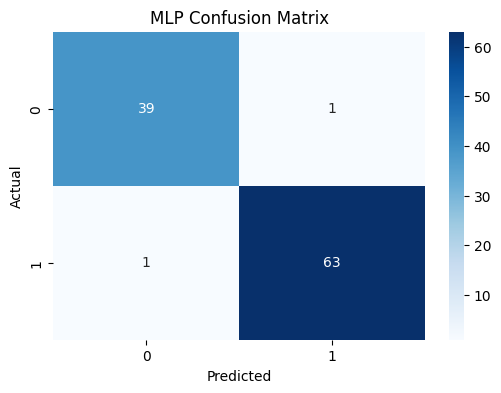

In [11]:
# Confusion matrix for the final MLP

# This is just a visualization of final_cm so it's easier to see
# how many patients were correctly vs incorrectly classified.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(final_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLP Confusion Matrix")
plt.show()

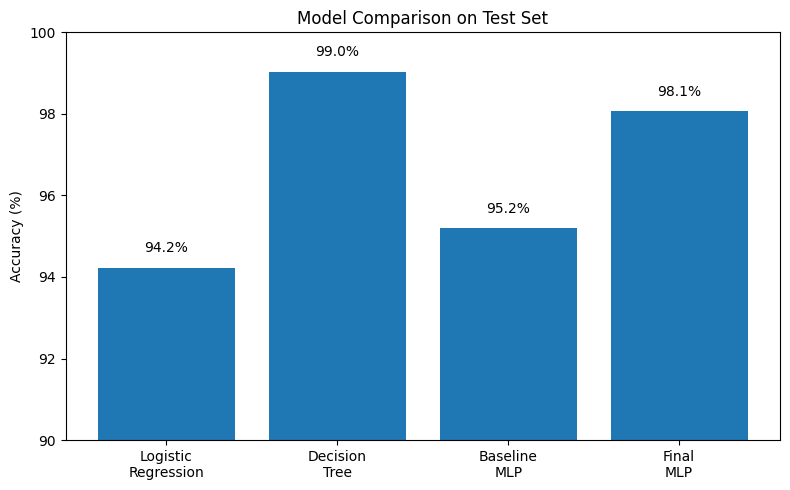

In [12]:
# Model accuracy bar chart
# It will show how each model performed next to each other

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score


# Re-evaluating each model on the same test set
acc_log_reg = accuracy_score(y_test, log_reg.predict(X_test))
acc_tree    = accuracy_score(y_test, dt.predict(X_test))
acc_base_mlp = accuracy_score(y_test, baseline_mlp_pipeline.predict(X_test))
acc_final_mlp = accuracy_score(y_test, final_mlp_pipeline.predict(X_test))

models = ["Logistic\nRegression", "Decision\nTree", "Baseline\nMLP", "Final\nMLP"]
accuracies = [acc_log_reg, acc_tree, acc_base_mlp, acc_final_mlp]


# Converting to percentages for  labels purposes
accuracies_pct = [a * 100 for a in accuracies]

plt.figure(figsize=(8, 5))

bars = plt.bar(models, accuracies_pct)

# Adding value labels on the top of each bar
for bar, acc in zip(bars, accuracies_pct):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.3,
             f"{acc:.1f}%",
             ha="center", va="bottom", fontsize=10)

plt.ylim(90, 100)  # gives depth to the graph
plt.ylabel("Accuracy (%)")
plt.title("Model Comparison on Test Set")
plt.tight_layout()
plt.show()


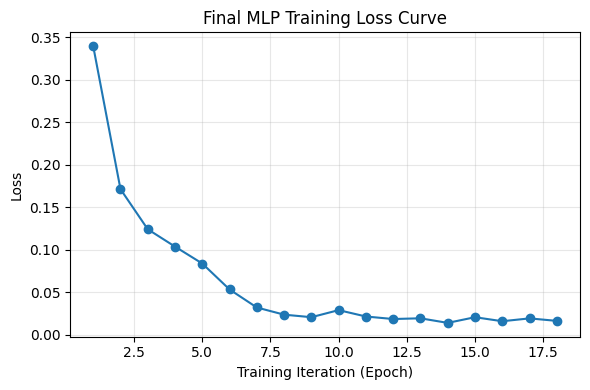

In [13]:
# Training loss curve for the final MLP
# This shows how the training loss decreases over epochs


# Grabs the underlying MLP object from the pipeline
final_mlp = final_mlp_pipeline.named_steps["mlp"]

# list stores the loss value at each training iteration
loss_values = final_mlp.loss_curve_


plt.figure(figsize=(6, 4))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker="o")

plt.xlabel("Training Iteration (Epoch)")
plt.ylabel("Loss")
plt.title("Final MLP Training Loss Curve")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


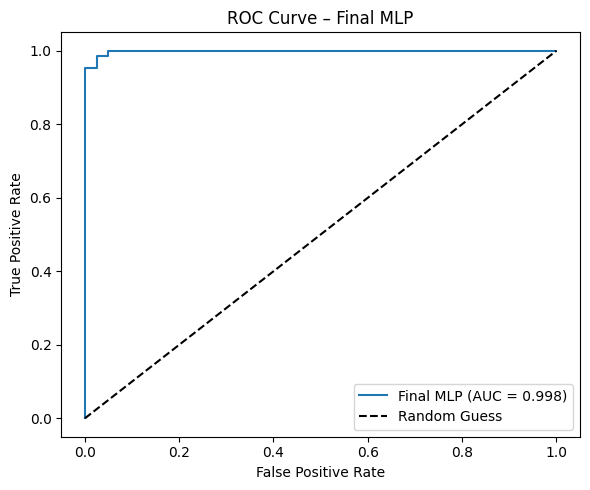

In [14]:
# ROC curve

# This ROC curve wll show how well the final MLP separates
# positive vs negative cases across all classification thresholds

from sklearn.metrics import roc_curve, auc

# first we are getting the predicted probabilities for the positive class
y_proba_final = final_mlp_pipeline.predict_proba(X_test)[:, 1]

# computing false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_proba_final)


# Area under the curve
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Final MLP (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")  # makes the diagonal line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final MLP")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

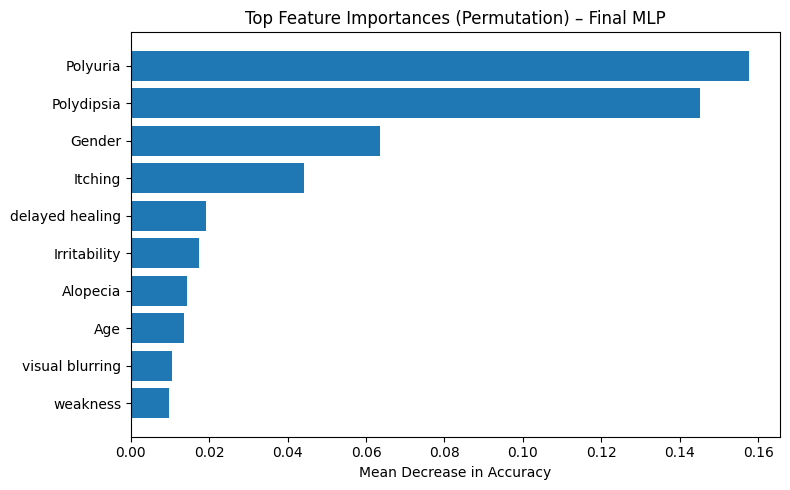

In [15]:
# Permutation Feature Importance for final MLP
# We created this to help estimate which attributes
#in our dataset are the most important for predictions

# Permutation importance specifically measures how much the accuracy drops

from sklearn.inspection import permutation_importance

# Run permutation importance on the test set
result = permutation_importance(
    final_mlp_pipeline,
    X_test,
    y_test,
    n_repeats=10,         # # of times to shuffle each feature
    random_state=42,
    n_jobs=-1             # uses all cores
)

importances_mean = result.importances_mean
feature_names = X.columns

# Sort features by importance and it'll be descending
indices = np.argsort(importances_mean)[::-1]


# Displaying top 10 features
k = 10
top_indices = indices[:k]



plt.figure(figsize=(8, 5))
plt.barh(range(k), importances_mean[top_indices][::-1])
plt.yticks(range(k), feature_names[top_indices][::-1])
plt.xlabel("Mean Decrease in Accuracy")
plt.title("Top Feature Importances (Permutation) – Final MLP")
plt.tight_layout()
plt.show()


Some references used to help us with this notebook:



*   https://christophm.github.io/interpretable-ml-book/feature-importance.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

